In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.interpolate

In [2]:
epochs = 400
L = 12

In [3]:
all_rbms = []  # List to store all RBMs

# Loop through each file and load the RBMs
#for i in range(1, 51):  # Assuming file names are from 1 to 100
    #file_name = f'rbms_group_{i}.pt'
    #rbms_batch = torch.load(file_name)
    #all_rbms.extend(rbms_batch)  # Add the loaded RBMs to the list

# Save all RBMs into one file
#torch.save(all_rbms, f'{epochs}epochs_L{L}_250_rbms.pt')

In [4]:
loaded_rbms = torch.load(f'{epochs}epochs_L{L}_250_rbms.pt')
len(loaded_rbms)

250

# Spin-Spin Correlations

In [5]:
w = [0]*len(loaded_rbms)
for i in range(0,len(loaded_rbms)):
    w[i] = loaded_rbms[i].parameters()[0]
    w[i] = torch.mm(w[i].t(),w[i])
    
    # plt.title(f'$W_{i+1}W_{i+1}^T$', fontsize= 20)
    # sns.heatmap(w[i], linewidths= 0.0, cmap= 'viridis')
    # plt.show()

In [6]:
np.shape(w[0])

torch.Size([144, 144])

In [7]:
w_matrix_np = w[0].numpy()
np.mean(w_matrix_np)

3.527788

In [8]:

lattice_size = L
distance_matrix = np.zeros((lattice_size**2, lattice_size**2))

# Calculate distances
for i in range(lattice_size**2):
    for j in range(lattice_size**2):
        x1, y1 = divmod(i, lattice_size)
        x2, y2 = divmod(j, lattice_size)
        distance_matrix[i, j] = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

correlation_by_distance = {}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


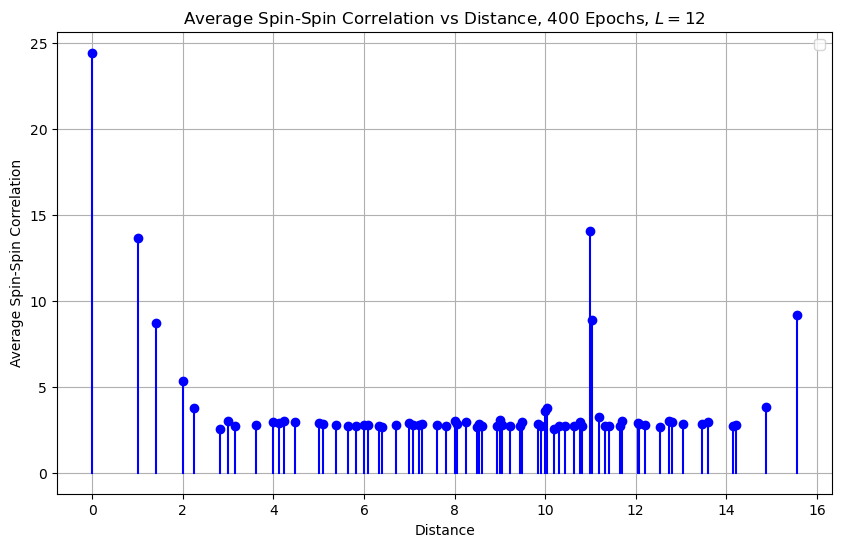

{0.0: 24.437063,
 1.0: 13.668057,
 2.0: 5.31916,
 3.0: 3.0038316,
 4.0: 2.940339,
 5.0: 2.8663435,
 6.0: 2.7543983,
 7.0: 2.8771813,
 8.0: 3.0109158,
 9.0: 3.0423818,
 10.0: 3.5971315,
 11.0: 14.062638,
 1.4142135623730951: 8.74027,
 2.23606797749979: 3.7734327,
 3.1622776601683795: 2.7368536,
 4.123105625617661: 2.9020164,
 5.0990195135927845: 2.8332462,
 6.082762530298219: 2.751951,
 7.0710678118654755: 2.7992337,
 8.06225774829855: 2.8347254,
 9.055385138137417: 2.7719808,
 10.04987562112089: 3.772266,
 11.045361017187261: 8.886197,
 2.8284271247461903: 2.5607762,
 3.605551275463989: 2.795322,
 4.47213595499958: 2.941518,
 5.385164807134504: 2.8001626,
 6.324555320336759: 2.7387898,
 7.280109889280518: 2.8085945,
 8.246211251235321: 2.9442544,
 9.219544457292887: 2.7330973,
 10.198039027185569: 2.516709,
 11.180339887498949: 3.2485025,
 4.242640687119285: 3.016358,
 5.830951894845301: 2.7384293,
 6.708203932499369: 2.7487705,
 7.615773105863909: 2.750347,
 8.54400374531753: 2.850363

In [9]:
for w_matrix in w:
    for i in range(lattice_size**2):
        for j in range(lattice_size**2):
            distance = distance_matrix[i, j]
            correlation = w_matrix[i, j]
            if distance not in correlation_by_distance:
                correlation_by_distance[distance] = []
            correlation_by_distance[distance].append(correlation)

# Average correlations for each distance
average_correlation = {dist: np.mean(correlations) for dist, correlations in correlation_by_distance.items()}

# Prepare data for plotting
distances = sorted(average_correlation.keys())
correlations = [average_correlation[dist] for dist in distances]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each point with a line and a dot
for distance, correlation in zip(distances, correlations):
    plt.plot([distance, distance], [0, correlation], color='b')  # Line from x-axis to the point
    plt.plot(distance, correlation, 'bo')  # The dot

y=2.8
#plt.axhline(y=y, color='r', linestyle='--', label=f'y={y}')
plt.legend()

# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('Average Spin-Spin Correlation')
plt.title(r'Average Spin-Spin Correlation vs Distance, $400$ Epochs, $L=12$')

# Grid for better readability
plt.grid(True)
plt.savefig('spin_spin_400_L12.png')
# Display the plot
plt.show()
average_correlation


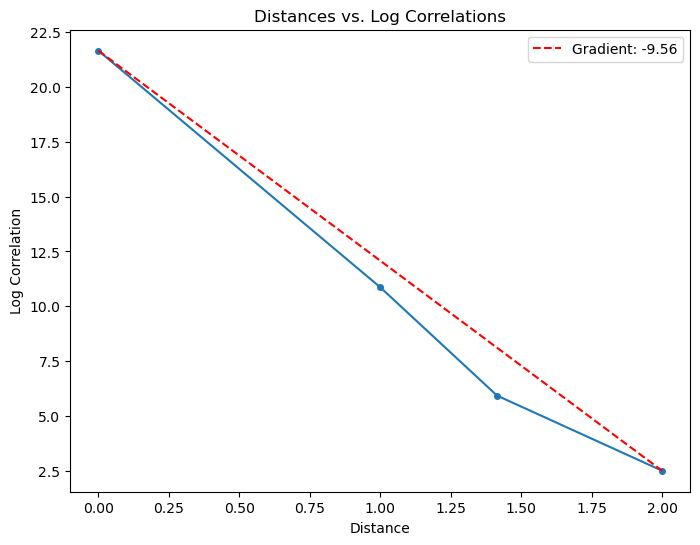

In [10]:
# Assuming distances and correlations are defined as before
distances = np.array(sorted(average_correlation.keys()))
correlations = np.array([average_correlation[dist] for dist in distances])
correlations -= y

filtered_distances = distances[:4]
filtered_correlations = correlations[:4]

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.plot(filtered_distances, filtered_correlations, 'o-', markersize=4)

# Calculate the gradient
x1, x2 = filtered_distances[0], filtered_distances[-1]
y1, y2 = filtered_correlations[0], filtered_correlations[-1]
gradient = (y2 - y1) / (x2 - x1)

# Plot the gradient line
plt.plot([x1, x2], [y1, y1 + gradient * (x2 - x1)], 'r--', label=f'Gradient: {gradient:.2f}')


# Optionally, add labels and a title
plt.xlabel('Distance')
# plt.ylim(top=18)
#plt.xlim(left=0)

plt.ylabel('Log Correlation')
plt.title('Distances vs. Log Correlations')
plt.legend()
plt.show()

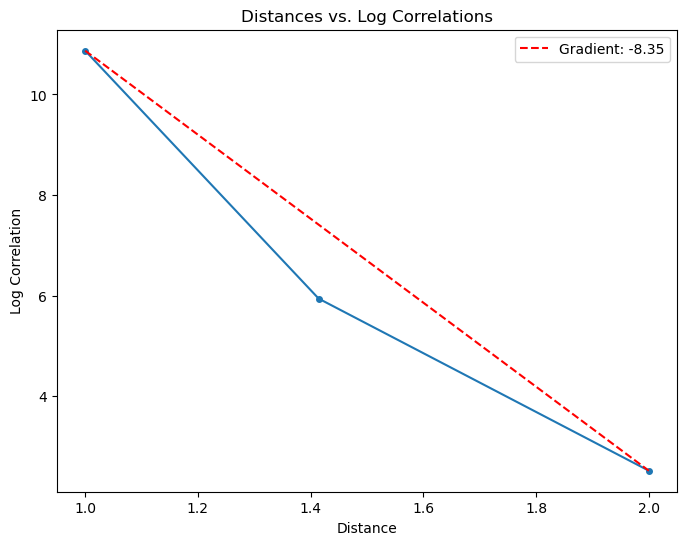

In [11]:
# Assuming distances and correlations are defined as before
distances = np.array(sorted(average_correlation.keys()))
correlations = np.array([average_correlation[dist] for dist in distances])
correlations -= y



filtered_distances = distances[1:4]
filtered_correlations = correlations[1:4]

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.plot(filtered_distances, filtered_correlations, 'o-', markersize=4)

# Calculate the gradient
x1, x2 = filtered_distances[0], filtered_distances[-1]
y1, y2 = filtered_correlations[0], filtered_correlations[-1]
gradient = (y2 - y1) / (x2 - x1)

# Plot the gradient line
plt.plot([x1, x2], [y1, y1 + gradient * (x2 - x1)], 'r--', label=f'Gradient: {gradient:.2f}')


# Optionally, add labels and a title
plt.xlabel('Distance')
# plt.ylim(top=18)
#plt.xlim(left=0)

plt.ylabel('Log Correlation')
plt.title('Distances vs. Log Correlations')
plt.legend()
plt.show()

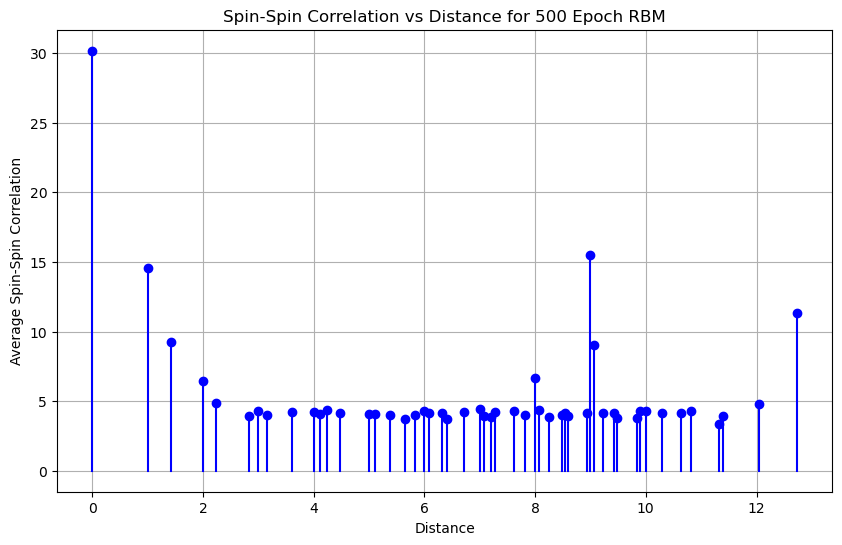

array([1.        , 0.34555987, 0.23663524, 0.186773  , 0.16036506,
       0.14588249, 0.14550681, 0.14702025, 0.13902758, 0.13591385,
       0.13305797, 0.14098985, 0.12688619, 0.13058281, 0.12924999,
       0.12804493, 0.12342148, 0.1332097 , 0.12491795, 0.12747945,
       0.13873023, 0.12161226, 0.12347606, 0.14012332, 0.12575017,
       0.12603268, 0.13231711, 0.12949306, 0.12014794, 0.19596769,
       0.13590705, 0.13641775, 0.12752546, 0.12987606, 0.1152578 ,
       0.1197922 , 0.3373203 , 0.21824923, 0.1154654 , 0.10870917,
       0.11797731, 0.10798182, 0.09934716, 0.12296963, 0.10278469,
       0.09984723, 0.10831645, 0.11341779, 0.11822908, 0.1351169 ,
       0.25806305], dtype=float32)

In [220]:
loaded_rbm = torch.load('RBM_model_T_complete_nv100_nh100_lr1.0E-02_k1_bsize100_nepochs500.pt')
x = loaded_rbm.parameters()[0]
x = torch.mm(x.t(),x)
w_matrix = x

correlation_by_distance = {}
for i in range(lattice_size**2):
    for j in range(lattice_size**2):
        distance = distance_matrix[i, j]
        correlation = w_matrix[i, j]
        if distance not in correlation_by_distance:
            correlation_by_distance[distance] = []
        correlation_by_distance[distance].append(correlation)

# Average correlations for each distance
average_correlation = {dist: np.mean(correlations) for dist, correlations in correlation_by_distance.items()}

# Prepare data for the bar chart
distances = sorted(average_correlation.keys())
correlations = [average_correlation[dist] for dist in distances]


# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot each point with a line and a dot
for distance, correlation in zip(distances, correlations):
    plt.plot([distance, distance], [0, correlation], color='b')  # Line from x-axis to the point
    plt.plot(distance, correlation, 'bo')  # The dot

# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('Average Spin-Spin Correlation')
plt.title('Spin-Spin Correlation vs Distance for 500 Epoch RBM')

# Grid for better readability
plt.grid(True)

# Display the plot
plt.show()
normalized_correlations

# Correcting periodic boundary effects

Due to periodic boundary effects, spin-spin correlations at distance 9 will equal 1 and at distance 8 will equal 2. We will also see a high correlation at 12.728 as it is where the diagonal wrapping occurs. This is what we see.

# Spline interpolation to correct for bias at further distance when trying to fit curve - BE VERY CAREFUL WITH THIS, THIS WILL AFFECT MY CORRELATION LENGTH!

# Correlation Length - maybe set $C_0$ manually from $WW^T$ averages?

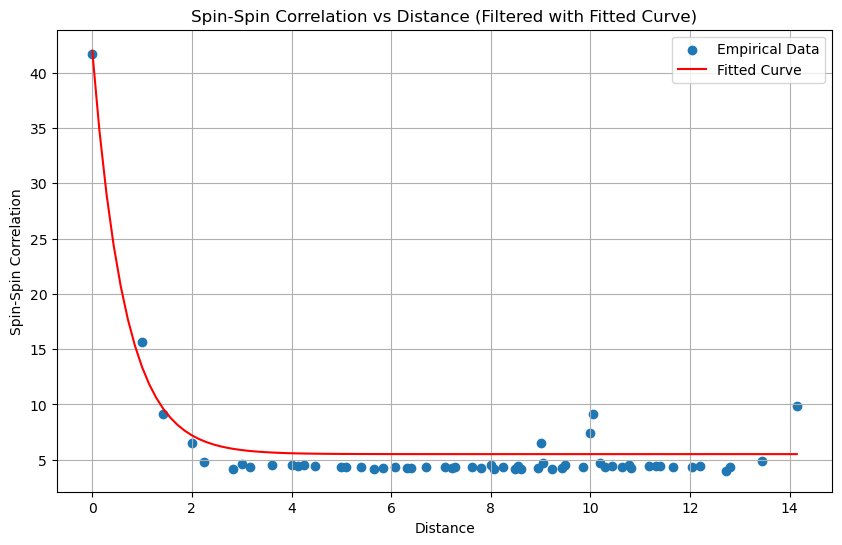

In [12]:


# Assuming distances and correlations are defined as before
distances = np.array(sorted(average_correlation.keys()))
correlations = np.array([average_correlation[dist] for dist in distances])

# Define the distances to be excluded and a tolerance for comparison
# These are the ones we've just mentioned
exclude_distances = [6, 7, 9.9]
tolerance = 0.001  # This is the range within which distances will be excluded

################## Perform cubic spline interpolation with the filtered data
# spline = scipy.interpolate.CubicSpline(filtered_distances, filtered_correlations)
# List of new distances to interpolate
# new_distances = [0.1,0.25, 0.5, 0.75]  # Example list of new distances

# Interpolate each new distance and add to the dictionary
# for new_distance in new_distances:
    # interpolated_correlation = spline(new_distance)
    # average_correlation[new_distance] = np.mean(interpolated_correlation)
############################## check this spline is working properly though!
    
# Filter the distances and correlations
filtered_indices = np.all([np.abs(distances - ex_dist) > tolerance for ex_dist in exclude_distances], axis=0)
filtered_distances = distances[filtered_indices]
filtered_correlations = correlations[filtered_indices]

# Convert to numpy arrays for spline interpolation
filtered_distances = np.array(filtered_distances)
filtered_correlations = np.array(filtered_correlations)


# Define the exp_decay function
def exp_decay(x, C0, xi):
    return C0 * np.exp(-10*x / xi) +5.5
    
# Perform the curve fitting on filtered data
params, _ = curve_fit(exp_decay, filtered_distances, filtered_correlations, p0=[1, 1])

# Extract the correlation length
C0_fit, xi_fit = params

# Convert filtered distances and correlations to logarithmic scale for the plot
non_zero_indices = filtered_distances > 0
log_distances = np.log(filtered_distances[non_zero_indices])
log_correlations = np.log(filtered_correlations[non_zero_indices])

# Create the plot
fitted_distances = np.linspace(min(filtered_distances), max(filtered_distances), 100)
fitted_correlations = exp_decay(fitted_distances, C0_fit, xi_fit)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_distances, filtered_correlations, label='Empirical Data')
plt.plot(fitted_distances, fitted_correlations, color='red', label='Fitted Curve')
plt.xlabel('Distance')
plt.ylabel('Spin-Spin Correlation')
plt.title('Spin-Spin Correlation vs Distance (Filtered with Fitted Curve)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# this is underweight because bias to more samples at lower correlation and further dist

In [32]:
C0_fit

33.072591067362495

In [33]:
xi_fit

8.029309171401556

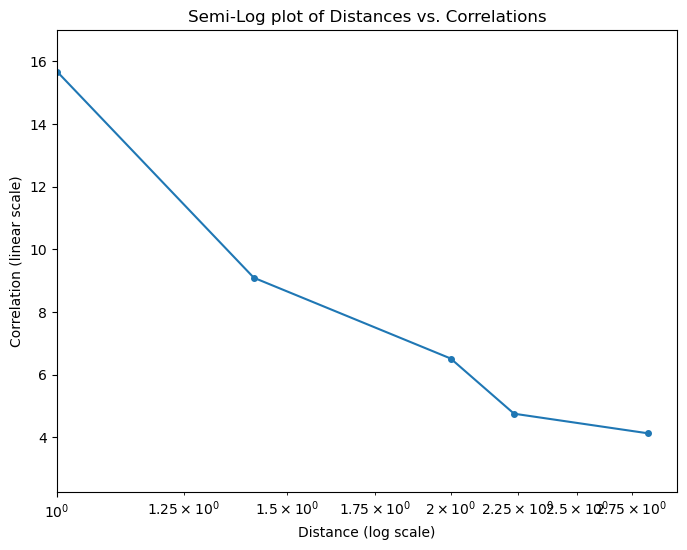

In [14]:
# Assuming distances and correlations are defined as before
distances = np.array(sorted(average_correlation.keys()))
correlations = np.array([average_correlation[dist] for dist in distances])

# Define the distances to be excluded and a tolerance for comparison
# These are the ones we've just mentioned
exclude_distances = [6, 7, 9.9]
tolerance = 0.001  # This is the range within which distances will be excluded
    
# Filter the distances and correlations
filtered_indices = np.all([np.abs(distances - ex_dist) > tolerance for ex_dist in exclude_distances], axis=0)
filtered_distances = distances[filtered_indices]
filtered_correlations = correlations[filtered_indices]

# Convert to numpy arrays for spline interpolation
filtered_distances = np.array(filtered_distances)
filtered_correlations = np.array(filtered_correlations)

filtered_distances = filtered_distances[:6]
filtered_correlations = filtered_correlations[:6]

# Create the semi-log plot (logarithmic x-axis, linear y-axis)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.semilogx(filtered_distances, filtered_correlations, 'o-', markersize=4)

# Optionally, add labels and a title
plt.xlabel('Distance (log scale)')
plt.ylim(top=17)
plt.xlim(left=1)

plt.ylabel('Correlation (linear scale)')
plt.title('Semi-Log plot of Distances vs. Correlations')

# Show the plot
plt.show()

In [13]:
distances = np.array(sorted(average_correlation.keys()))
correlations = np.array([average_correlation[dist] for dist in distances])

# Selecting the 2nd and 8th data points
# Note: Python uses 0-based indexing, so the 2nd data point is at index 1 and the 8th is at index 7
distance_2nd = distances[1]  # 2nd data point
correlation_2nd = correlations[1]

distance_8th = distances[7]  # 8th data point
correlation_8th = correlations[7]

# Calculating the gradient between these two points
gradient = (correlation_8th - correlation_2nd) / (distance_8th - distance_2nd)

# Print the calculated gradient
print("Gradient between the 2nd and 8th data points:", gradient)

Gradient between the 2nd and 8th data points: -5.235012910883072


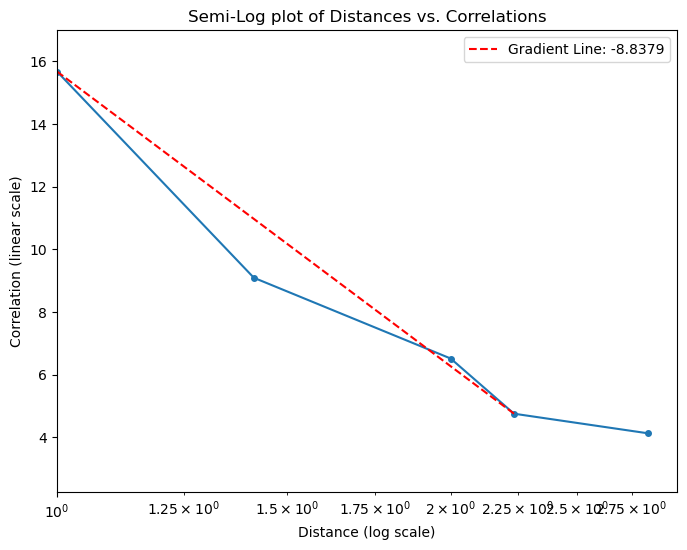

In [15]:
# Filter the distances and correlations
filtered_indices = np.all([np.abs(distances - ex_dist) > tolerance for ex_dist in exclude_distances], axis=0)
filtered_distances = distances[filtered_indices]
filtered_correlations = correlations[filtered_indices]

# Trimming the arrays for the desired range
filtered_distances = filtered_distances[:6]
filtered_correlations = filtered_correlations[:6]

# Create the semi-log plot (logarithmic x-axis, linear y-axis)
plt.figure(figsize=(8, 6))
plt.semilogx(filtered_distances, filtered_correlations, 'o-', markersize=4)

# Calculating the gradient between the 2nd and 8th data points
distance_2nd = filtered_distances[1]  # 2nd data point
correlation_2nd = filtered_correlations[1]

distance_8th = filtered_distances[4]  # 8th data point
correlation_8th = filtered_correlations[4]

gradient = (correlation_8th - correlation_2nd) / (distance_8th - distance_2nd)

# Plotting a line with the calculated gradient
# Choosing a starting point for the line
start_distance = distance_2nd
start_correlation = correlation_2nd

# Calculating the end point of the line using the gradient
end_distance = distance_8th
end_correlation = start_correlation + gradient * (end_distance - start_distance)

# Plotting the line
plt.plot([start_distance, end_distance], [start_correlation, end_correlation], 'r--', label=f'Gradient Line: {gradient:.4f}')

# Optionally, add labels and a title
plt.xlabel('Distance (log scale)')
plt.ylim(top=17)
plt.xlim(left=1)
plt.ylabel('Correlation (linear scale)')
plt.title('Semi-Log plot of Distances vs. Correlations')
plt.legend()

# Show the plot
plt.show()


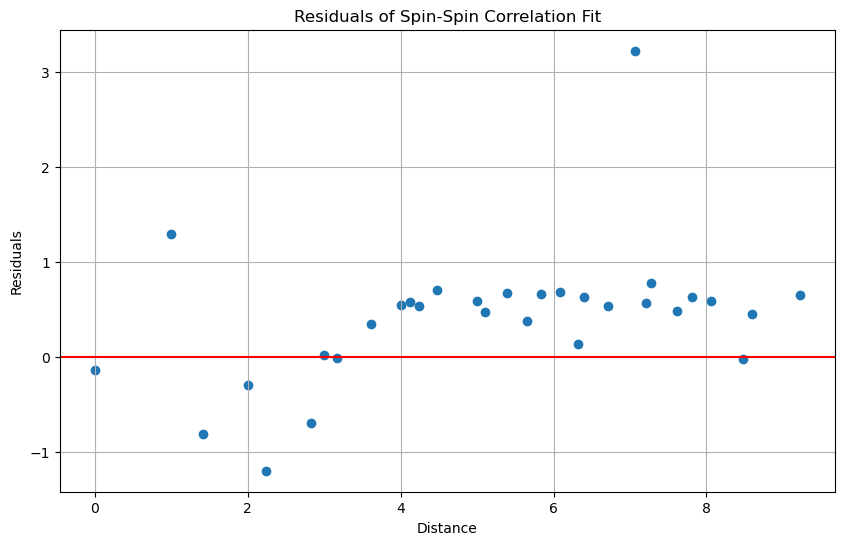

In [34]:
# Calculate residuals
predicted_correlations = exp_decay(filtered_distances, *params)
residuals = filtered_correlations - predicted_correlations

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(filtered_distances, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Residuals of Spin-Spin Correlation Fit')
plt.grid(True)
plt.show()

In [35]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Fit a linear model (necessary for Breusch-Pagan test)
model = sm.OLS(filtered_correlations, sm.add_constant(filtered_distances)).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# bp_test returns a tuple of test statistics and p-value
bp_stat, bp_pvalue = bp_test[:2]

# P val of < 0.05 shows that this suffers from heteroskedacticity
print("Breusch-Pagan test statistic:", bp_stat)
print("Breusch-Pagan test p-value:", bp_pvalue)


Breusch-Pagan test statistic: 5.676723288716422
Breusch-Pagan test p-value: 0.017191444969293746


# FINDINGS

- Spin-spin correlations depend on number of epochs rbm is trained on
- Higher number of epochs gives higher values of spin-spin correlations - get numbers!
- There are identical correlation patters at distances caused by periodic boundary effects at distnace 8,9,12,73. These occur in the same pattern on all epochs. (tested 500 - 8000)
- We estimate $C_0$ by fitting a curve to our spin-spin correlation vs distance and by taking the average of the zero distance spin correlations in the weight matrix
- $ \bar{C}_0 = \frac{1}{N} \sum_{i=1}^{N} (WW^T)_{ii},~~ C(d)=C_0e^{-\frac{d}{\hat{\xi}}}$ 
- Need many $WW^T$ samples to produce accurate correlation length $\xi$ estimate
- $C_0$ increases with number of epochs
- $\xi$ seems to decrease with number of epochs

Given the spin-spin correlation function: 
$$ C(d) = C_0 e^{-\frac{d}{\xi}} $$

Where:
- $C(d)$ is the correlation at distance $d$.
- $C_0$ is the correlation at zero distance.
- $\xi$ is the correlation length.
- $d$ is the distance between spins.

The goal is to fit this function to the empirical data and find the optimal values for $C_0$ and $\xi$.

This is done through a curve fitting process, typically using least squares optimization.

The fitted function is:
$$ C(d) = \hat{C}_0 e^{-\frac{d}{\hat{\xi}}} $$

Where:
- $\hat{C}_0$ and $\hat{\xi}$ are the estimated parameters from the fitting process.

The estimated correlation length $\hat{\xi}$ provides a quantitative measure of how far correlations extend in the lattice.

check: $$\hat{C}_0 = \bar{C}_0 ??$$

# How $(WW^T)_{ij}$ maps to L=10 lattice

so how does i=97 and j = 98 in WW^T correspond to the 10x10 lattice
ChatGPT
In a 10x10 lattice, where each site is represented by an index from 0 to 99 (total 100 sites), converting the indices from the linear format (like 97 and 98) to a 2D grid format requires mapping these indices to their respective x (row) and y (column) positions in the lattice.

Here’s how you can do this conversion:

Lattice Size: You have a 10x10 lattice, so there are 10 rows and 10 columns.

Converting Linear Index to 2D Coordinates:

The row index (x-coordinate) is obtained by integer division of the linear index by the number of columns.
The column index (y-coordinate) is obtained by taking the remainder of the linear index divided by the number of columns.
For indices i=97 and j=98:

For i=97:

The row index is 97 // 10 = 9.
The column index is 97 % 10 = 7.
So, this corresponds to the position (9, 7) on the 10x10 lattice.
For j=98:

The row index is 98 // 10 = 9.
The column index is 98 % 10 = 8.
So, this corresponds to the position (9, 8) on the 10x10 lattice.
These positions are zero-indexed. In a typical matrix layout, this would mean the 10th row (since indexing starts from 0) and the 8th and 9th columns respectively. This mapping helps in visualizing and understanding the spatial relationships represented by the indices in the context of the 2D lattice structure.

# Convergence of Correlation Lengths

In [12]:
test_size = 250
xi_box = []

# Load RBMs once
loaded_rbms = torch.load(f'{epochs}epochs_L{L}_250_rbms.pt')

# Precompute distance matrix
lattice_size = L
distance_matrix = np.zeros((lattice_size**2, lattice_size**2))
for i in range(lattice_size**2):
    for j in range(lattice_size**2):
        x1, y1 = divmod(i, lattice_size)
        x2, y2 = divmod(j, lattice_size)
        distance_matrix[i, j] = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

w = []
correlation_by_distance = {}

for test in range(0, test_size + 1):
    if test > 0:
        new_w = loaded_rbms[test - 1].parameters()[0]
        new_w = torch.mm(new_w.t(), new_w)
        w.append(new_w)

        for i in range(lattice_size**2):
            for j in range(lattice_size**2):
                distance = distance_matrix[i, j]
                correlation = new_w[i, j]
                if distance not in correlation_by_distance:
                    correlation_by_distance[distance] = []
                correlation_by_distance[distance].append(correlation)

    if not w:
        continue

    # Average correlations for each distance
    average_correlation = {dist: np.mean(correlations) for dist, correlations in correlation_by_distance.items()}

    # Prepare data for plotting
    distances = np.array(sorted(average_correlation.keys()))
    correlations = np.array([average_correlation[dist] for dist in distances])

    # Assuming distances and correlations are defined as before
    distances = np.array(sorted(average_correlation.keys()))
    correlations = np.array([average_correlation[dist] for dist in distances])
    correlations -= y



    filtered_distances = distances[1:4]
    filtered_correlations = correlations[1:4]


    # Calculate the gradient
    x1, x2 = filtered_distances[0], filtered_distances[-1]
    y1, y2 = filtered_correlations[0], filtered_correlations[-1]
    gradient = (y2 - y1) / (x2 - x1)


    xi_box.append(gradient)

xi_box

[-8.70893383026123,
 -8.733129501342773,
 -8.566568374633789,
 -8.502766609191895,
 -8.494338989257812,
 -8.494272232055664,
 -8.476314544677734,
 -8.400850296020508,
 -8.415116310119629,
 -8.422393798828125,
 -8.440485954284668,
 -8.4345703125,
 -8.37282657623291,
 -8.38156795501709,
 -8.379674911499023,
 -8.394445419311523,
 -8.398322105407715,
 -8.395952224731445,
 -8.401034355163574,
 -8.380048751831055,
 -8.3845853805542,
 -8.3848295211792,
 -8.368172645568848,
 -8.361519813537598,
 -8.36861801147461,
 -8.382623672485352,
 -8.375234603881836,
 -8.372857093811035,
 -8.3584566116333,
 -8.34545612335205,
 -8.35071849822998,
 -8.351686477661133,
 -8.358264923095703,
 -8.364954948425293,
 -8.364076614379883,
 -8.367711067199707,
 -8.36721420288086,
 -8.36787223815918,
 -8.366382598876953,
 -8.368901252746582,
 -8.366474151611328,
 -8.368508338928223,
 -8.358713150024414,
 -8.359561920166016,
 -8.354204177856445,
 -8.348464965820312,
 -8.350048065185547,
 -8.355968475341797,
 -8.3548421

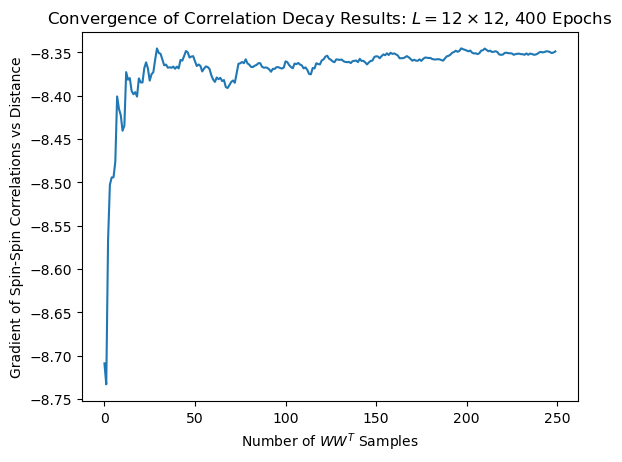

In [14]:
plt.plot(xi_box)
plt.title(fr'Convergence of Correlation Decay Results: $L= {L} \times {L}$, ${epochs}$ Epochs')
plt.xlabel(r'Number of $WW^T$ Samples')
plt.ylabel(r'Gradient of Spin-Spin Correlations vs Distance')

# Saving the plot to a file
plt.savefig(f'convergence_of_correlation_length_L{L}_{epochs}epochs.png')

# Displaying the plot
plt.show()